## Purwadhika Data Science Final Project - Natural Language Processing ##

[Text Emotion Dataset](https://github.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset) is used for this project. This dataset will be used for train machine learning model to predict and classify the customer emotion.  
  
It consists of combining machine learning techniques with text using math and statistics to get that text in a format that the machine learning algorithms can understand.

In [1]:

import warnings
warnings.filterwarnings("ignore")
import os
from os import path
from PIL import Image


from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score


from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,precision_score, balanced_accuracy_score,f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, jaccard_score
# from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer

### Check out the data


In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv('data/Twitter_Emotion_Dataset.csv')
df.head(5)
len(df)

4401

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 2 columns):
label    4401 non-null object
tweet    4401 non-null object
dtypes: object(2)
memory usage: 34.4+ KB



__Let's use groupby to use describe by Category, this way we can begin to think about the features that separate ham and spam!__


In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [6]:
df.groupby('label').describe()


tweet                                                               
        count unique                                                top freq
label                                                                       
anger    1101   1100  belajar agama yg tuntas jd nga ngarang dalam h...    2
fear      649    646  Melihat Fotonya Saja Bikin Ngeri, Apalagi Meng...    2
happy    1017   1012  [USERNAME] Selamat Siang Sahabat Pos. Kiriman ...    4
love      637    636  Walaupun kita jauh secara fisik, kita tahu kit...    2
sadness   997    996  Turut sepenanggungan atas meninggalnya dr. Ram...    2

Let's make a new column to detect how long the text messages are

In [7]:
df['Length'] = df['tweet'].apply(len)
# df['label'].unique()
df.head()

,label,tweet,Length
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",220
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",235
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,116
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",250
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",203


Let's see the percentage of ham and spam in our dataset

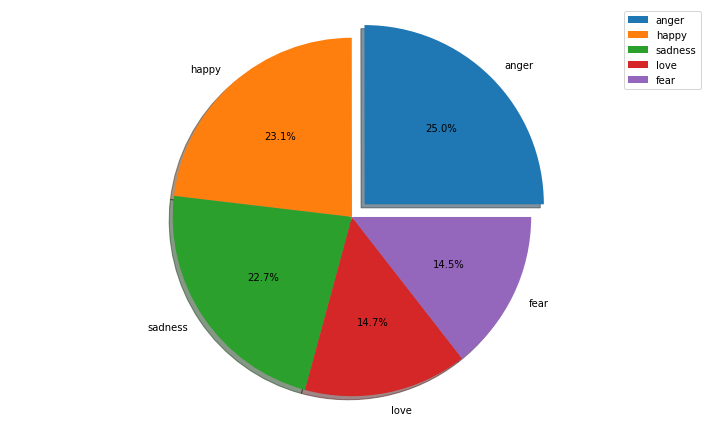

In [8]:
explode = (0.1,0,0,0,0)  
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(df['label'].value_counts(), explode=explode,labels=['anger', 'happy', 'sadness', 'love', 'fear'], autopct='%1.1f%%',
        shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

Text(0.5, 0, 'Length')

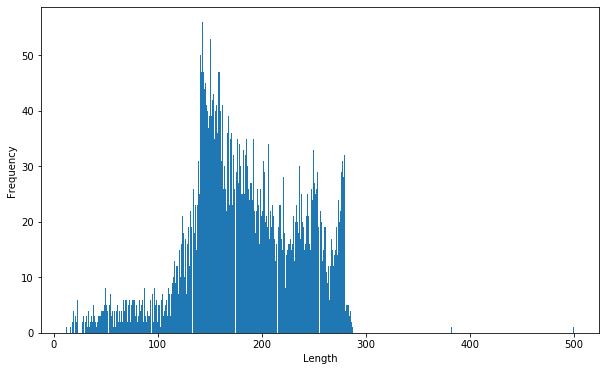

In [9]:
plt.figure(figsize=(10,6))
df['Length'].plot.hist(bins = 500)
plt.xlabel('Length')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139405F8>,
      dtype=object)

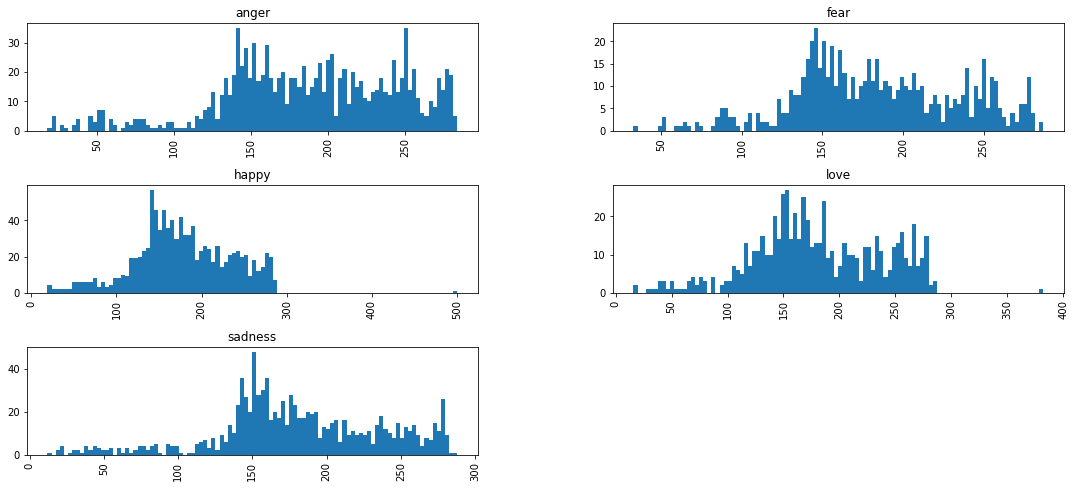

In [10]:
df.hist(column='Length',by='label',bins=100,figsize=(18,8))

One of the text has 500 characters, let's use masking to find this message:


In [11]:
df[df['Length']==500]['tweet'].iloc[0]

'Acara tahunan "Sanusi Family", ini lah wajah para anak, cucu, cucu menantu, dan cicit terempong. Smg thn berikutnya bs makin kompak dan lengkap #7-8juli2018 [URL]\nanger;Wkwkwkw Keknya dah seminggu lebih meledak2 mulu. Emang orang sekitar gue pada gblk atau emang gaada otaknya dari dulu cuma gue nya yg sabar\nsadness;sabar ya boy kamu slalu d hina tmanku pdhal kamu ndak salah apa"" kamu slalu d bipang manusia lastik tpikan kamu bukan manusia plastik. Kapan temanku tdak mrnghinamu boy hwaiting boy"'

### WordCloud

In [12]:
import nltk
from nltk.corpus import stopwords
import string
import warnings
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize

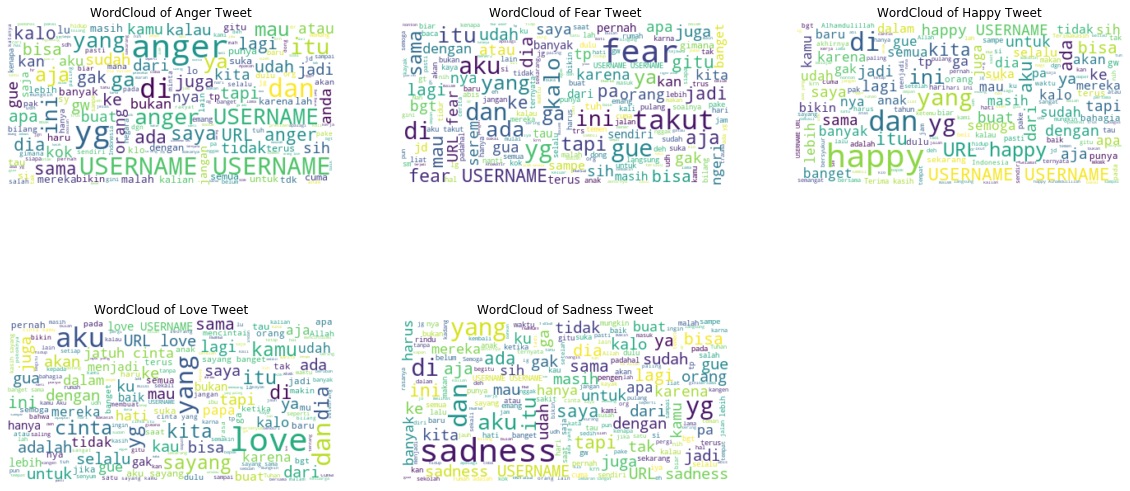

In [13]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
tweetAnger = open(path.join(d, 'data/dataAnger.csv')).read()
tweetFear= open(path.join(d, 'data/dataFear.csv')).read()
tweetHappy = open(path.join(d, 'data/dataHappy.csv')).read()
tweetLove= open(path.join(d, 'data/dataLove.csv')).read()
tweetSad= open(path.join(d, 'data/datasadness.csv')).read()

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

# lower max_font_size
wordcloudAnger = WordCloud(max_font_size=40, background_color="white").generate(tweetAnger)
wordcloudFear= WordCloud(max_font_size=40, background_color="white").generate(tweetFear)
wordcloudHappy = WordCloud(max_font_size=40, background_color="white").generate(tweetHappy)
wordcloudLove= WordCloud(max_font_size=40, background_color="white").generate(tweetLove)
wordcloudSad= WordCloud(max_font_size=40, background_color="white").generate(tweetSad)

plt.figure(figsize=(20,10))
plt.subplot(231)
plt.imshow(wordcloudAnger, interpolation="bilinear")
plt.title('WordCloud of Anger Tweet')
plt.axis("off")

plt.subplot(232)
plt.imshow(wordcloudFear, interpolation="bilinear")
plt.title('WordCloud of Fear Tweet')
plt.axis("off")

plt.subplot(233)
plt.imshow(wordcloudHappy, interpolation="bilinear")
plt.title('WordCloud of Happy Tweet')
plt.axis("off")

plt.subplot(234)
plt.imshow(wordcloudLove, interpolation="bilinear")
plt.title('WordCloud of Love Tweet')
plt.axis("off")

plt.subplot(235)
plt.imshow(wordcloudSad, interpolation="bilinear")
plt.title('WordCloud of Sadness Tweet')
plt.axis("off")
plt.show()



## Feature Extraction

### Text Cleaning

clean the text for the messages in dataset

============================

    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Handling lower/upper case
    3. Stemming text
    4. Returns a list of the cleaned text


In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string

In [45]:
def text_process(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
#     Handling lower/upper case
    nopunc= nopunc.lower()
    
#     Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    output   = stemmer.stem(nopunc)
    
    
#     Returns a list of the cleaned text
    return "".join(output)


In [46]:
# Check to make sure its working
sentence='Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan'
chek= text_process(sentence)
chek

'ekonomi indonesia sedang dalam tumbuh yang bangga'

### Vectorization

Now we have the messages as lists and we need to convert each of those messages into a vector that SciKit Learn's algorithm models can work with.


In [47]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

#### 1. Count Vectorization ####

In [48]:
bow_trans= CountVectorizer(analyzer=text_process).fit(df['tweet'])

In [49]:
len(bow_trans.vocabulary_)
# bow_trans

37

In [50]:
tweet= df['tweet'][3]
# pesan1= df[df['Length'] == 910]['Message'].iloc[0]
tweet

'Jln Jatibaru,bagian dari wilayah Tn Abang.Pengaturan wilayah tgg jwb dan wwnang gub.Tng Abng soal rumit,sejak gub2 , trdahulu.Skrg sedng dibenahi,agr bermnfaat semua pihak.Mohon yg punya otak,berpikirlah dgn wajar,kecuali otaknya butek.Ya kamu. [URL]'

In [51]:
bow1= bow_trans.transform([tweet])
print(bow1)
# print(bow1.shape)

  (0, 0)	30
  (0, 3)	1
  (0, 11)	34
  (0, 12)	11
  (0, 13)	1
  (0, 14)	6
  (0, 15)	9
  (0, 16)	1
  (0, 17)	15
  (0, 18)	7
  (0, 19)	12
  (0, 20)	5
  (0, 21)	9
  (0, 22)	8
  (0, 23)	5
  (0, 24)	17
  (0, 25)	5
  (0, 26)	4
  (0, 28)	12
  (0, 29)	5
  (0, 30)	11
  (0, 31)	13
  (0, 33)	6
  (0, 35)	5


In [53]:
print(bow_trans.get_feature_names()[35])
print(bow_trans.get_feature_names()[31])

y
u


#### 2. Term Frequency-Inverse Document Frequency (TF-IDF) ####

In [54]:
tfidf_transformer = TfidfTransformer().fit(bow1)
tfidf4 = tfidf_transformer.transform(bow1)
print(tfidf4)


  (0, 35)	0.08154100913168028
  (0, 33)	0.09784921095801632
  (0, 31)	0.21200662374236873
  (0, 30)	0.1793902200896966
  (0, 29)	0.08154100913168028
  (0, 28)	0.19569842191603265
  (0, 26)	0.06523280730534423
  (0, 25)	0.08154100913168028
  (0, 24)	0.2772394310477129
  (0, 23)	0.08154100913168028
  (0, 22)	0.13046561461068845
  (0, 21)	0.1467738164370245
  (0, 20)	0.08154100913168028
  (0, 19)	0.19569842191603265
  (0, 18)	0.11415741278435239
  (0, 17)	0.24462302739504083
  (0, 16)	0.016308201826336056
  (0, 15)	0.1467738164370245
  (0, 14)	0.09784921095801632
  (0, 13)	0.016308201826336056
  (0, 12)	0.1793902200896966
  (0, 11)	0.5544788620954259
  (0, 3)	0.016308201826336056
  (0, 0)	0.48924605479008165


In [56]:
print(bow_trans.get_feature_names()[3])

2


### Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
df['Processed'] = df['tweet'].apply(text_process)

In [59]:
df.head()

,label,tweet,Length,Processed
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",220,soal jln jatibarupolisi tdk bs gertak gubernur...
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",235,sama cewe lho kayak harus bisa lebih rasain la...
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,116,kepingin gudeg mbarek bu hj amad foto dari goo...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",250,jln jatibarubagian dari wilayah tn abangpengat...
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",203,sharing alam aja kemarin jam 1800 batalin tike...


In [60]:
y = df.iloc[:,0].values
x= df['Processed']
xtr, xts, ytr, yts = train_test_split(x ,y,test_size = 0.25,random_state=42)
# print(len(xtr))
# print(len(xts))
# df['label'].unique()

## Training a Model ##
I using **scikit-learn's** [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) to store a pipeline of workflow. This will allow me to set up all the transformations that we will do to the data for future use.

The process of pipeline include:
- Using **CountVectorizer** to convert those tweet into a matrix of token counts.
- Using **TfidfTransformer** to measures how frequent a term occurs in a document and measures how important a term is.
- Last step of the pipeline is decide the machine learning for the classifier.

In [61]:
from sklearn import metrics

### Model with Default Parameters ###

In [62]:
pipelineNB = Pipeline([
    ('cv',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [63]:
pipelineNB.fit(xtr,ytr)
prediksi = pipelineNB.predict(xts)

In [64]:
pipeline_Random2 = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', RandomForestClassifier()),  # train on Count vectors with Random Forest
])

pipeline_SVC2 = Pipeline([
    ('cv', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', SVC()),  # train on Count vectors with Random Forest
])

In [101]:
pipeline_Random2.fit(xtr,ytr)
pipeline_SVC2.fit(xtr,ytr)

prediksiNBW = pipelineNB.predict(xts)
prediksiRFW= pipeline_Random2.predict(xts)
prediksiSVCW= pipeline_SVC2.predict(xts)



#### Random Forest ####

In [103]:
print(classification_report(yts,prediksiNBW))
print(classification_report(yts,prediksiRFW))
print(classification_report(yts,prediksiSVCW))


              precision    recall  f1-score   support

       anger       0.59      0.82      0.69       288
        fear       1.00      0.20      0.34       153
       happy       0.70      0.60      0.64       262
        love       0.85      0.29      0.43       154
     sadness       0.42      0.67      0.51       244

    accuracy                           0.57      1101
   macro avg       0.71      0.52      0.52      1101
weighted avg       0.67      0.57      0.55      1101

              precision    recall  f1-score   support

       anger       0.54      0.71      0.62       288
        fear       0.85      0.61      0.71       153
       happy       0.67      0.56      0.61       262
        love       0.72      0.77      0.74       154
     sadness       0.49      0.46      0.47       244

    accuracy                           0.61      1101
   macro avg       0.65      0.62      0.63      1101
weighted avg       0.63      0.61      0.61      1101

              precisio

### Hyperparameter Tuning ### 

#### Random Forest ####

In [66]:
# Number of trees in random forest
n_estimators = np.arange(100,400,100)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,30, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf' : min_samples_leaf,
               'classifier__bootstrap' : bootstrap
              }
BestParamsforest= GridSearchCV(pipeline_Random2, random_grid, cv=3, n_jobs= -1, verbose=1)
# BestParamsforest.fit(xtr,ytr)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 14.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('bow',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prepr

In [67]:
BestParamsforest.best_params_

{'classifier__bootstrap': False,
 'classifier__max_depth': None,
 'classifier__max_features': 'auto',
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 10,
 'classifier__n_estimators': 300}

#### Support Vector classification ####

In [68]:
random_grid = {'classifier__C': [ 0.1,1, 10, 100, 1000],
               'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
               'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
BestParamsSVC= GridSearchCV(pipeline_SVC2, random_grid, cv=3, n_jobs= -1, verbose=1)
BestParamsSVC.fit(xtr,ytr)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cv',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prepro

In [69]:
BestParamsSVC.best_params_

{'classifier__C': 1, 'classifier__gamma': 1, 'classifier__kernel': 'linear'}

In [113]:
multinomial_prediksi = multinomial_pipeline.predict(xts)
Forest_prediksi = BestParamsforest.predict(xts)
SVC_prediksi = BestParamsSVC.predict(xts)


## Improve Machine Learning Model ##


In [104]:
pipeline_RandomForest = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', RandomForestClassifier(max_depth= None, max_features= 'auto', n_estimators= 300, bootstrap= False,min_samples_leaf=2, min_samples_split=10 )),  # train on TF-IDF vectors with Random Forest
])

pipeline_SVC = Pipeline([
    ('cv', CountVectorizer()),  # strings to token integer counts
    ('tfidf',TfidfTransformer()),
    ('classifier', SVC(C= 1, gamma= 1, kernel= 'linear',probability=True)),  # train on TF-IDF vectors with Random Forest
])

In [105]:
pipeline_RandomForest.fit(xtr,ytr)
pipeline_SVC.fit(xtr,ytr)


Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree

In [107]:
Forest_prediksi = pipeline_RandomForest.predict(xts)
SVC_prediksi = pipeline_SVC.predict(xts)

#### Random Forest ####

              precision    recall  f1-score   support

       anger       0.60      0.70      0.65       288
        fear       0.88      0.65      0.74       153
       happy       0.68      0.60      0.64       262
        love       0.72      0.81      0.76       154
     sadness       0.49      0.49      0.49       244

    accuracy                           0.64      1101
   macro avg       0.67      0.65      0.66      1101
weighted avg       0.65      0.64      0.64      1101



Text(0.5, 15.0, 'Predicted label')

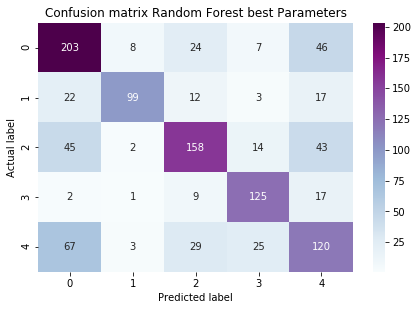

In [110]:
print(classification_report(yts,Forest_prediksi))

cm2 = confusion_matrix(yts,Forest_prediksi)
sb.heatmap(pd.DataFrame(cm2),annot=True, cmap="BuPu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Random Forest best Parameters', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Support Vector Machine ####

              precision    recall  f1-score   support

       anger       0.64      0.70      0.67       288
        fear       0.80      0.61      0.69       153
       happy       0.65      0.66      0.66       262
        love       0.80      0.75      0.78       154
     sadness       0.52      0.56      0.54       244

    accuracy                           0.65      1101
   macro avg       0.68      0.66      0.67      1101
weighted avg       0.66      0.65      0.66      1101



Text(0.5, 15.0, 'Predicted label')

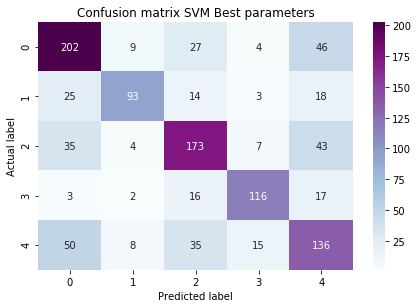

In [111]:
print(classification_report(yts,SVC_prediksi))

cm2 = confusion_matrix(yts,SVC_prediksi)
sb.heatmap(pd.DataFrame(cm2),annot=True, cmap="BuPu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix SVM Best parameters', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [112]:
hasil= pd.DataFrame([{"Base":0.52, 'Best':'-'},
                    {"Base":0.63, 'Best':0.66},
                    {"Base":0.66, 'Best':0.67},
                    {"Base":0.54, 'Best':'-'},
                    {"Base":0.64, 'Best':0.65},
                    {"Base":0.65, 'Best':0.66},],index=['Naive_Bayes','Random_Forest','SVC', 'NB without preprocess','RF without preprocess','SVC without preprocess'])
hasil

,Base,Best
Naive_Bayes,0.52,-
Random_Forest,0.63,0.66
SVC,0.66,0.67
NB without preprocess,0.54,-
RF without preprocess,0.64,0.65
SVC without preprocess,0.65,0.66


It seems **SVC with Best parameters** achieve highest f1 score compared to the other models.

Now trying to test the model using the **data** that model never seen before.

In [114]:
tweet = ["Soal 'mantan'.Jadi gimana? Masih mikirin mantan?"]
prediksi_test_cnb = pipeline_SVC.predict(tweet)

In [115]:
prediksi_test_cnb

array(['sadness'], dtype=object)

In [116]:
pipeline_RandomForest.predict_proba(tweet)

array([[0.25177247, 0.21035898, 0.16621042, 0.06041077, 0.31124736]])

### Create Joblib Model for Applications ###

In [117]:
import joblib

In [118]:
# joblib.dump(pipeline_SVC, 'model_subject_fiks')

['model_subject_fiks']